In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('darkgrid')
plt.style.use('ggplot')

In [2]:
# Load the dataset
url = "Avocado_HassAvocadoBoard_20152023v1.0.1.csv"
avocado_data = pd.read_csv(url)

In [3]:
# Display the first 10 rows of the dataset
avocado_data.head(100)

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015-01-04,1.30,5782.70,723.29,4221.15,0.00,838.26,223.33,614.93,0.0,organic,Spokane
96,2015-01-04,1.15,198735.26,125713.89,34555.73,53.54,38412.10,38400.99,11.11,0.0,conventional,StLouis
97,2015-01-04,1.80,3597.07,1552.48,1521.26,0.00,523.33,523.33,0.00,0.0,organic,StLouis
98,2015-01-04,1.33,41143.51,2506.61,20905.01,16.68,17715.21,17715.21,0.00,0.0,conventional,Syracuse


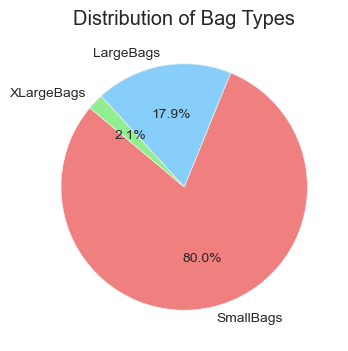

In [9]:
bag_types = ['SmallBags', 'LargeBags', 'XLargeBags']
total_bags = {bag: avocado_data[bag].sum() for bag in bag_types}

# Create data for the pie plot
sizes = list(total_bags.values())
labels = list(total_bags.keys())
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bag Types')
plt.show()

SmallBags: This category dominates the distribution, making up 80.0% of the total. This indicates that the majority of the bags in the dataset are small. 

LargeBags: These account for 17.9% of the total. While significantly less than SmallBags, they still represent a notable portion of the distribution.

XLargeBags: This is the smallest category, comprising only 2.1% of the total. This suggests that extra-large bags are relatively rare in the dataset. 

Overall: the data shows a clear preference for small bags, with large and extra-large bags being much less common.

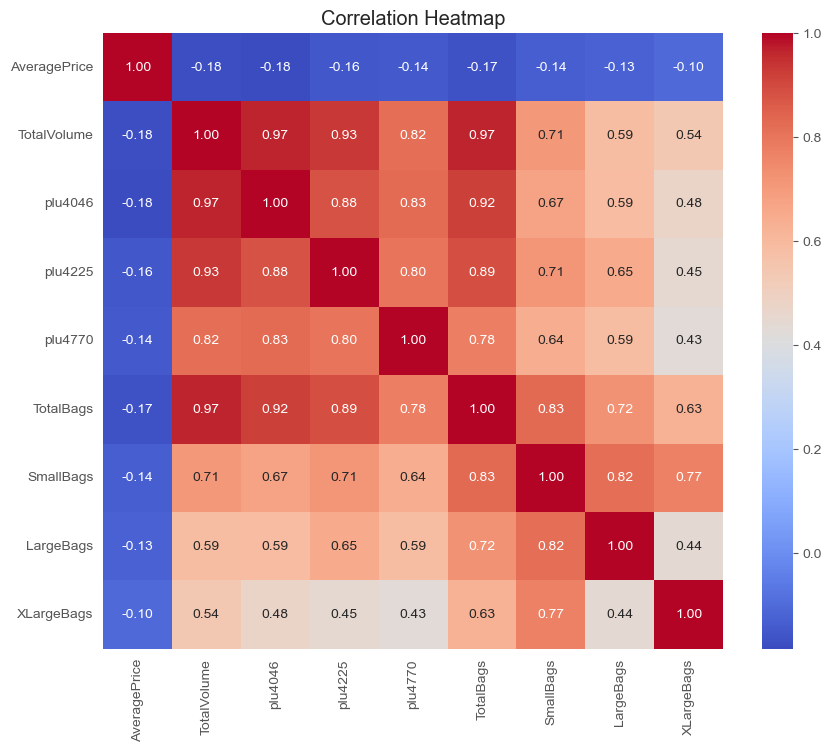

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_data = avocado_data.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Overall, the heatmap provides a clear visual representation of how different variables related to avocado sales are interrelated. The negative correlation between AveragePrice and other variables suggests that price increases may lead to lower sales volumes and fewer bags sold. Conversely, the strong positive correlations among the different types of avocados and total volume indicate that these variables tend to increase together

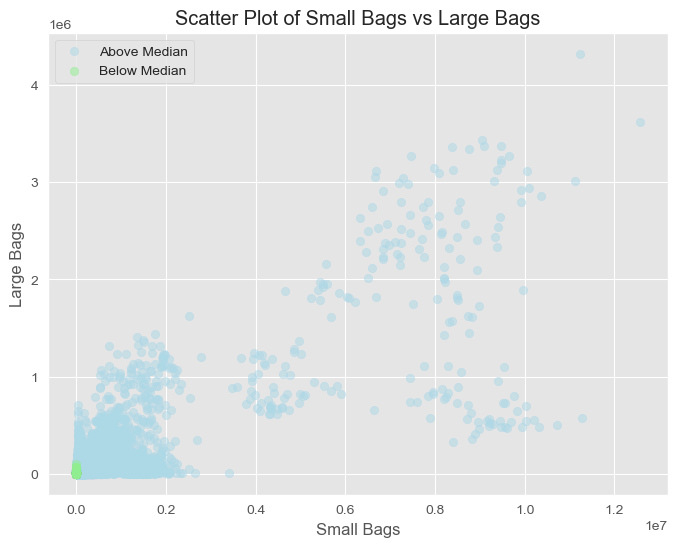

In [6]:

import matplotlib.pyplot as plt

# Assuming avocado_data is a DataFrame and you want to split based on a condition
condition = avocado_data['SmallBags'] > avocado_data['SmallBags'].median()

plt.figure(figsize=(8, 6))
plt.scatter(avocado_data[condition]['SmallBags'], avocado_data[condition]['LargeBags'], alpha=0.5, color='lightblue', label='Above Median')
plt.scatter(avocado_data[~condition]['SmallBags'], avocado_data[~condition]['LargeBags'], alpha=0.5, color='lightgreen', label='Below Median')
plt.xlabel('Small Bags')
plt.ylabel('Large Bags')
plt.title('Scatter Plot of Small Bags vs Large Bags')
plt.legend()


The plot distinguishes between two categories: "Above Median" (light blue dots) and "Below Median" (green dots).
The majority of the data points are light blue, indicating that most of the data falls above the median value for small bags.

Distribution:

The green dots (below median) are clustered near the origin, suggesting that when the number of small bags is below the median, the number of large bags is also relatively low.
The light blue dots (above median) are more spread out, indicating a wider range of values for both small and large bags when the number of small bags is above the median

Overall, the scatter plot provides a visual representation of how the sales of small and large bags of avocados are related. The positive correlation suggests that as the number of small bags sold increases, the number of large bags sold also tends to increase. The clustering of green dots near the origin highlights that lower sales of small bags correspond to lower sales of large bags.

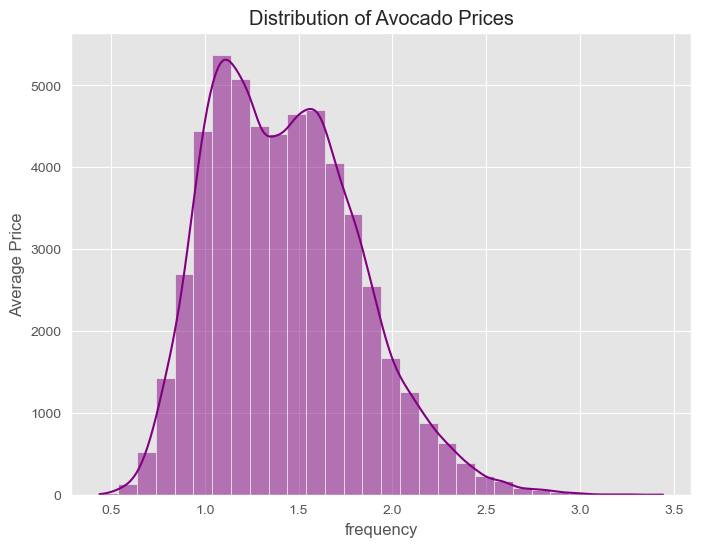

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(avocado_data['AveragePrice'], bins=30, kde=True, color='purple')
plt.title('Distribution of Avocado Prices')
plt.xlabel('frequency')
plt.ylabel('Average Price')
plt.show()

In [ ]:
The histogram with a superimposed density plot provides insights into the distribution of the average price of avocados. Here are some key observations:

Distribution Shape:

The data is right-skewed, meaning that most of the frequency values are concentrated on the lower end of the scale, with fewer occurrences as the frequency increases.
The peak of the histogram is around the 1.0 to 1.5 range, indicating that this is the most common frequency range for the average price.

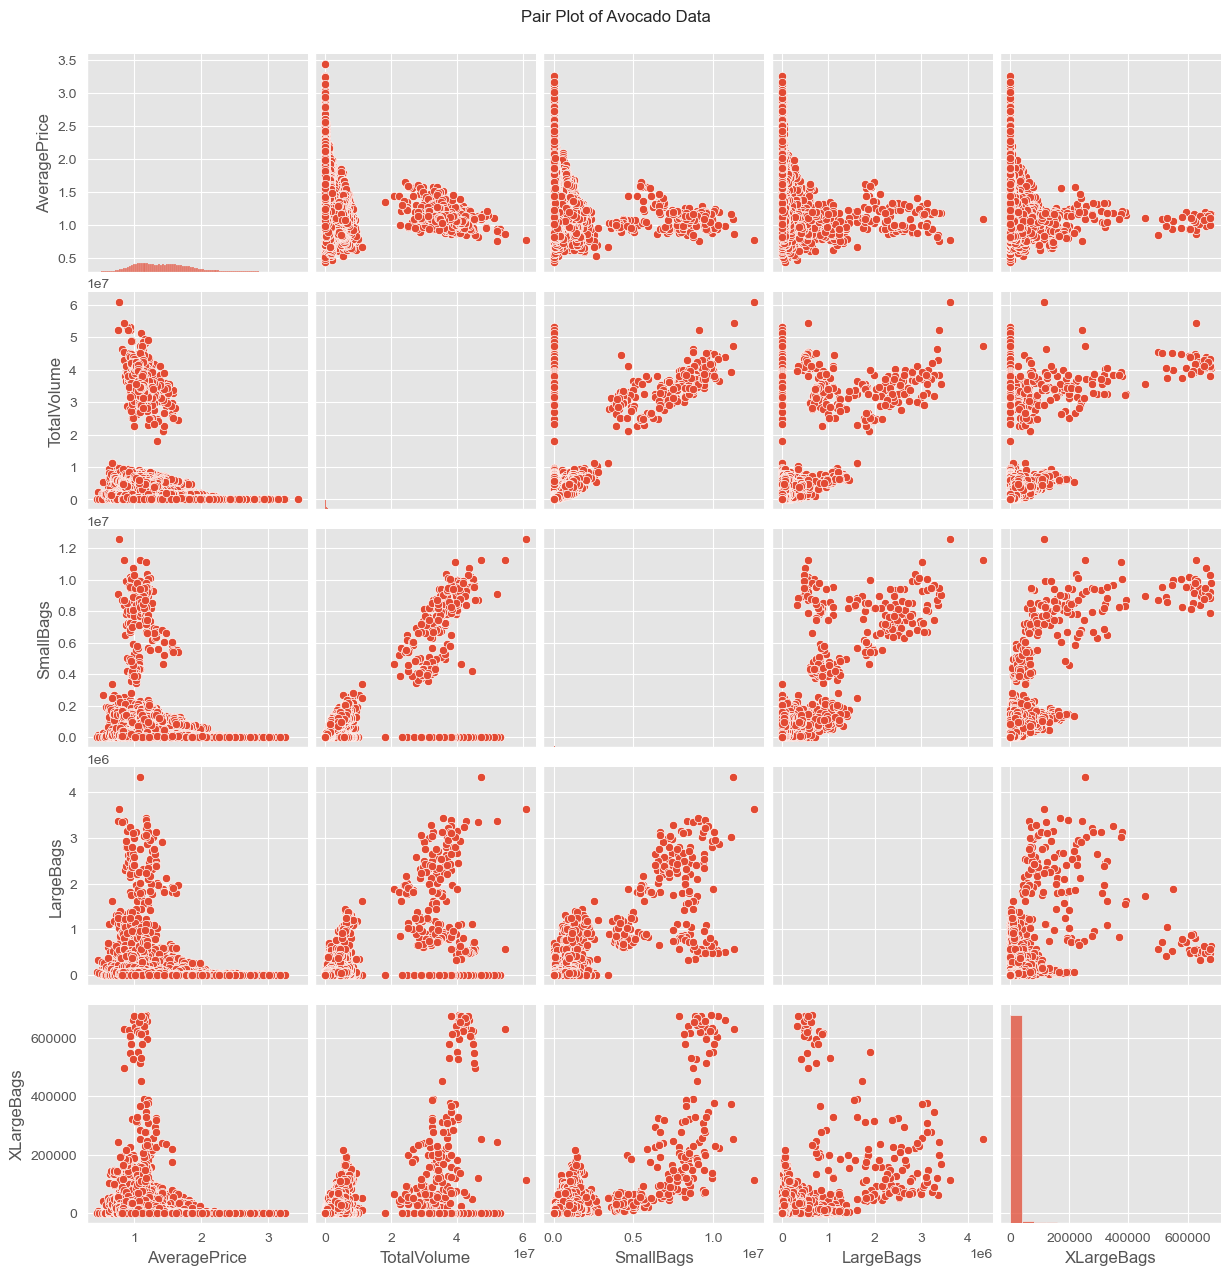

In [10]:
import seaborn as sns

sns.pairplot(avocado_data[['AveragePrice', 'TotalVolume', 'SmallBags', 'LargeBags', 'XLargeBags']])
plt.suptitle('Pair Plot of Avocado Data', y=1.02)
plt.show()